##ID: GO_STP_342

##Task link: https://www.goeduhub.com/11634/decision-machine-learning-predict-eligibility-housing-finance

In [1]:
#IMPORTS
import numpy as np 

import pandas as pd 

from matplotlib import pyplot as plt

import sklearn

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier 

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix 

from sklearn.metrics import accuracy_score , f1_score


In [2]:
df = pd.read_csv("./dataset/DreamHF_data.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.shape

(614, 13)

In [6]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
df = df.drop(columns=['Loan_ID']) # dropping the unique  Loan ID
enc_df=pd.get_dummies(df,drop_first=True)
enc_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [8]:
# Split Features and Target Varible 
X = enc_df.drop(columns='Loan_Status_Y')
y = enc_df['Loan_Status_Y']

In [9]:
# Splitting into Train -Test Data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [10]:
# Handling/Imputing Missing values 
imp = IterativeImputer(random_state=7)
imp.fit(X_train)
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

In [11]:
tree_clf = DecisionTreeClassifier(random_state=7)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=7)

In [12]:
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0


In [13]:
y_test_pred = tree_clf.predict(X_test)
print("Test Data Set Accuracy: ", accuracy_score(y_test,y_test_pred))
print("Test Data F1 Score ", f1_score(y_test,y_test_pred))

Test Data Set Accuracy:  0.7317073170731707
Test Data F1 Score  0.8023952095808382


In [14]:
tree_clf.feature_importances_

array([0.20953886, 0.13484385, 0.1828354 , 0.04264554, 0.28356323,
       0.01182608, 0.0162204 , 0.02663684, 0.02286376, 0.00473043,
       0.01193871, 0.02052818, 0.01387201, 0.0179567 ])

In [15]:
cm=np.array(confusion_matrix(y_test,y_test_pred))
cm

array([[23, 15],
       [18, 67]], dtype=int64)

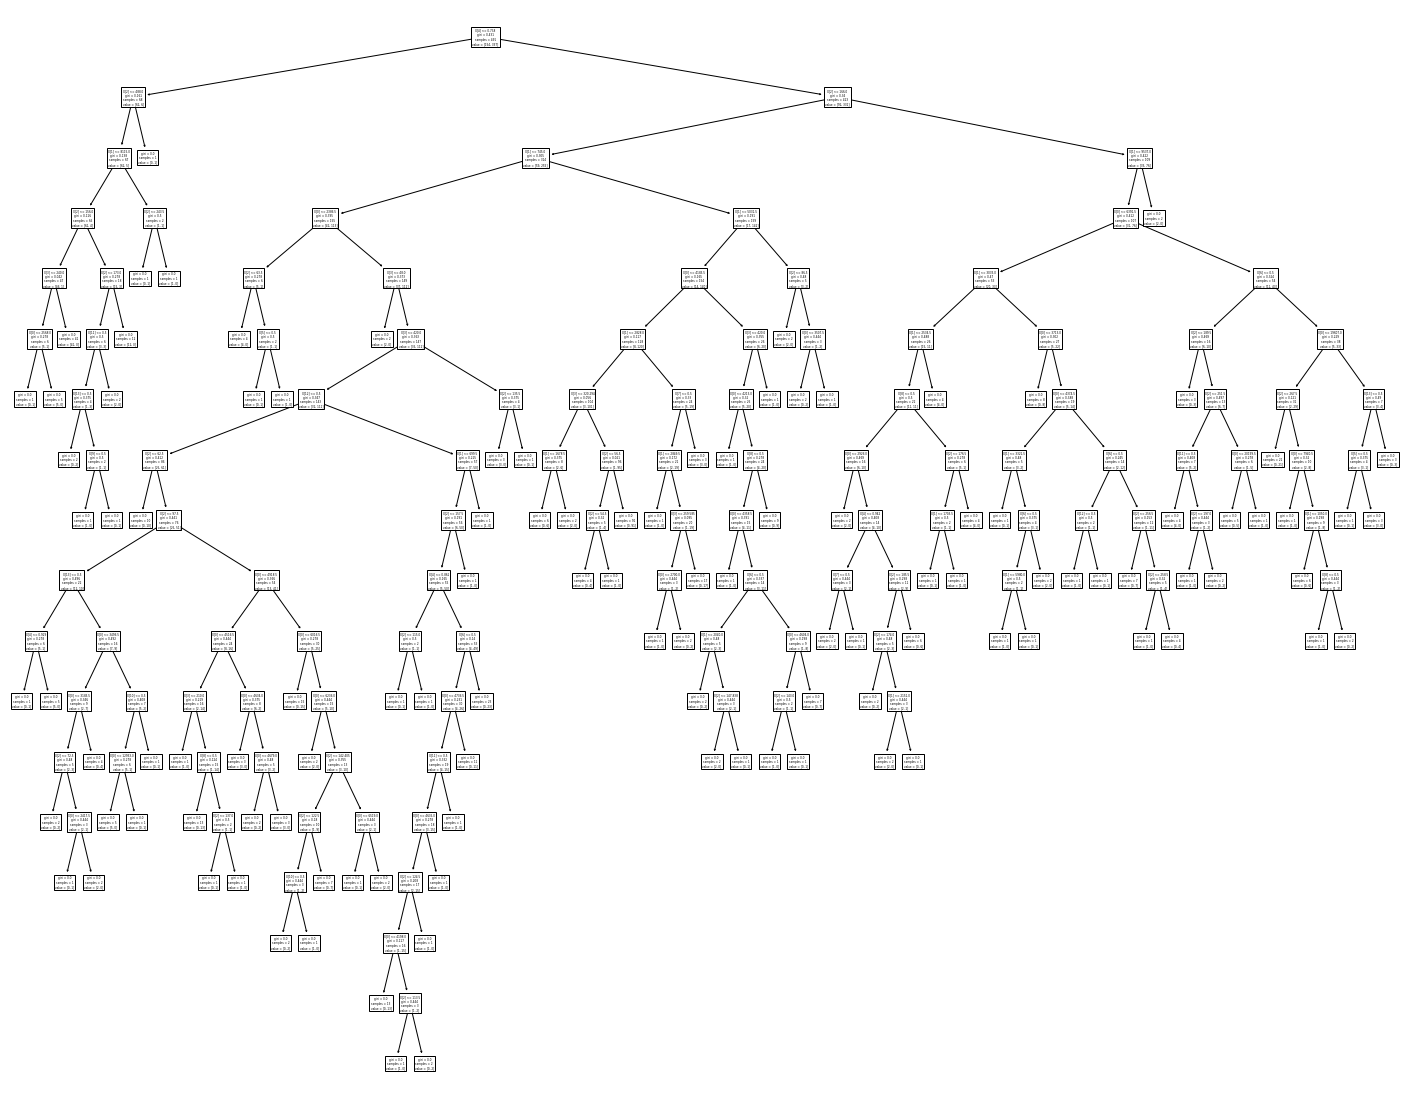

In [16]:
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(tree_clf)

In [17]:
# taking max_depth as 5
tree_clf = DecisionTreeClassifier(max_depth = 5,random_state=7)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=7)

In [18]:
# adding the max_depth parameter has given 5 % increase in accuracy
y_test_pred = tree_clf.predict(X_test)
print("Test Data Set Accuracy: ", accuracy_score(y_test,y_test_pred))
print("Test Data F1 Score ", f1_score(y_test,y_test_pred))

Test Data Set Accuracy:  0.7967479674796748
Test Data F1 Score  0.8571428571428571


In [19]:
cm=np.array(confusion_matrix(y_test,y_test_pred))
cm

array([[23, 15],
       [10, 75]], dtype=int64)

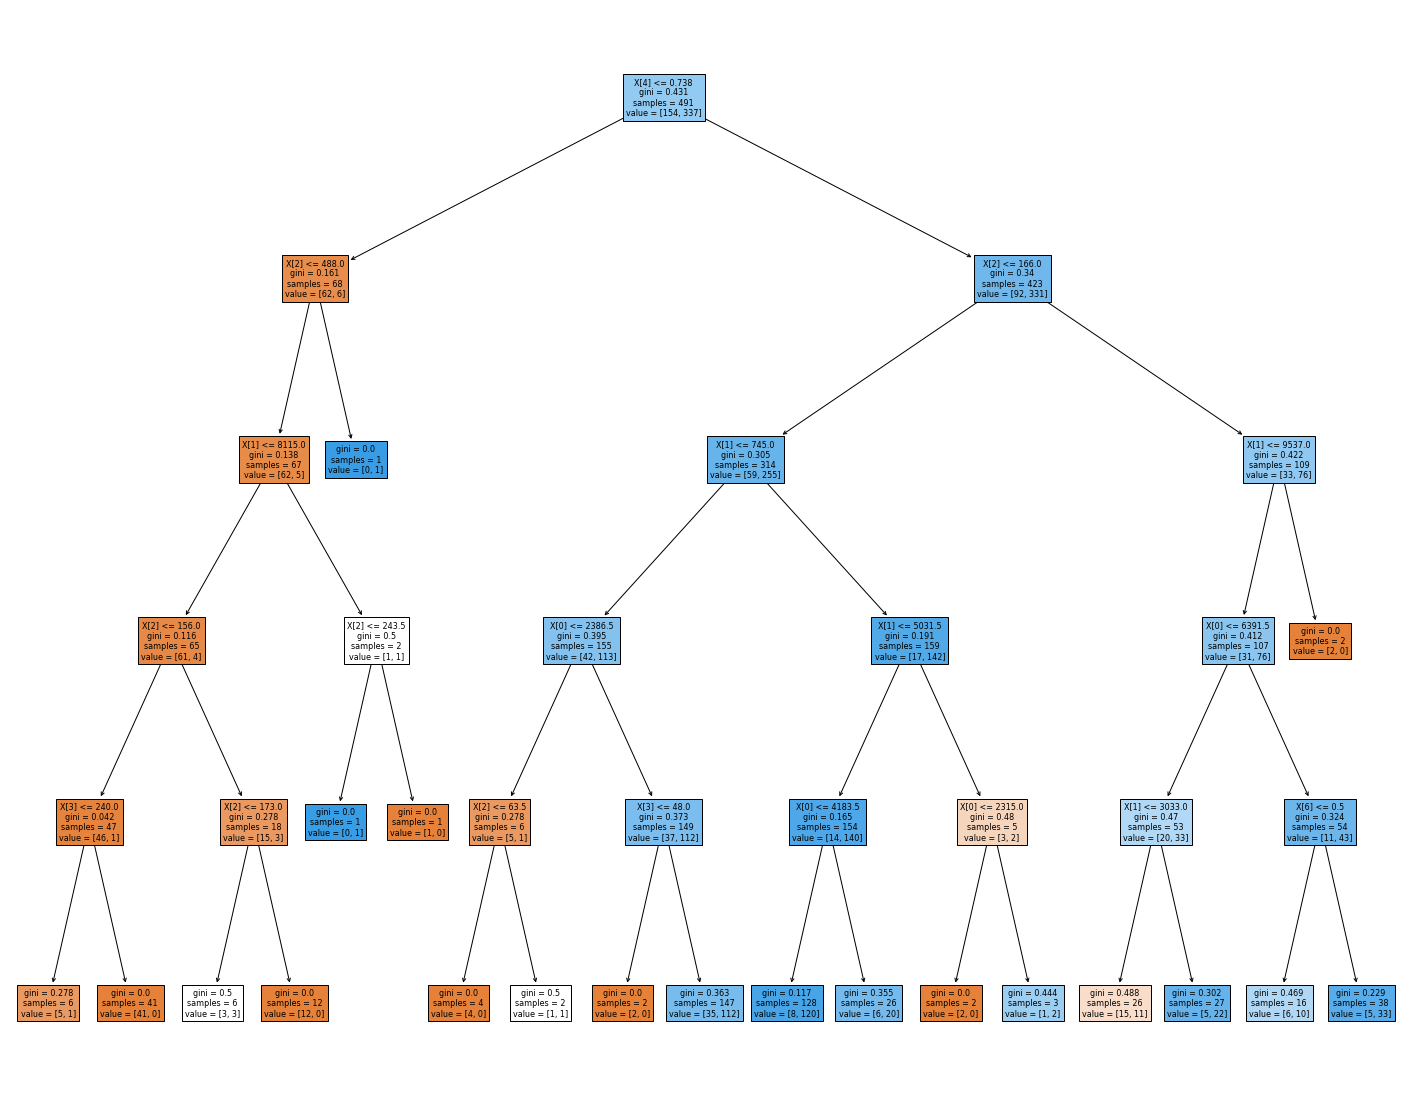

In [20]:
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(tree_clf,filled=True)

In [21]:
# taking max_depth as 3 gave a 5 % increase in accuracy
tree_clf = DecisionTreeClassifier(max_depth = 3,random_state=7)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=7)

In [22]:
y_test_pred = tree_clf.predict(X_test)
print("Test Data Set Accuracy: ", accuracy_score(y_test,y_test_pred))
print("Test Data F1 Score ", f1_score(y_test,y_test_pred))

Test Data Set Accuracy:  0.8455284552845529
Test Data F1 Score  0.8983957219251337


In [23]:
cm=np.array(confusion_matrix(y_test,y_test_pred))
cm

array([[20, 18],
       [ 1, 84]], dtype=int64)

In [24]:
# min_samples_leaf=40 - giving a miniscule increase in accuracy of 1 % only!
tree_clf = DecisionTreeClassifier(max_depth = 3,random_state=7,min_samples_leaf=40)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=40, random_state=7)

In [25]:
y_test_pred = tree_clf.predict(X_test)
print("Test Data Set Accuracy: ", accuracy_score(y_test,y_test_pred))
print("Test Data F1 Score ", f1_score(y_test,y_test_pred))

Test Data Set Accuracy:  0.8536585365853658
Test Data F1 Score  0.903225806451613


In [26]:
cm=np.array(confusion_matrix(y_test,y_test_pred))
cm

array([[21, 17],
       [ 1, 84]], dtype=int64)

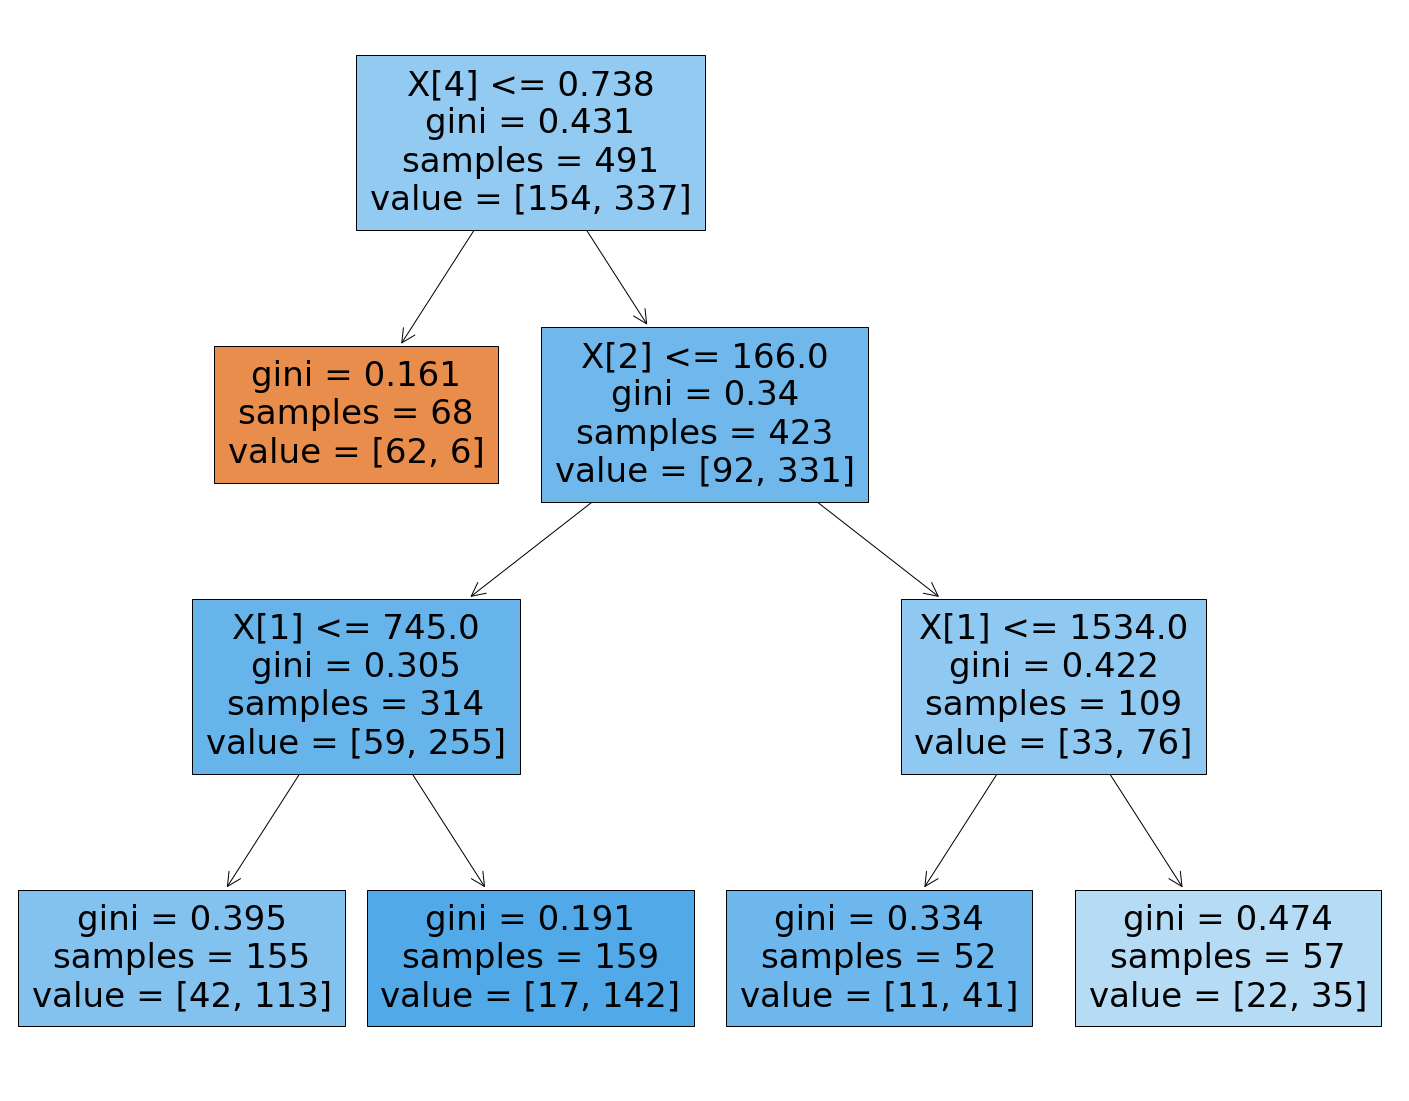

In [27]:
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(tree_clf,filled=True)